In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import category_encoders as ce
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('gsm_clean.csv')
df.head()

,oem,model,battery_charging,platform_cpu,platform_gpu,body_sim,network_technology,display_type,main_camera_video,selfie_camera_video,...,display_resolution,display_size,sound_3.5mm_jack,platform_os,platform_chipset,memory,ram,removability,battery_capacity,misc_price
0,Google,Pixel 4 XL,18.0,8.0,Adreno 640,Mini-SIM,LTE,P-OLED,4K,1080p,...,1440 x 3040,6.3,No,Android,Qualcomm SM8150 Snapdragon 855,64,6,Non-removable,3700,479.99
1,Google,Pixel 4,18.0,8.0,Adreno 640,Mini-SIM,LTE,P-OLED,4K,1080p,...,1080 x 2280,5.7,No,Android,Qualcomm SM8150 Snapdragon 855,64,6,Non-removable,2800,524.52
2,Google,Pixel 3a XL,18.0,8.0,Adreno 615,Mini-SIM,LTE,OLED,4K,1080p,...,1080 x 2160,6.0,Yes,Android,Qualcomm SDM670 Snapdragon 670,64,4,Non-removable,3700,261.60
3,Google,Pixel 3a,18.0,8.0,Adreno 615,Mini-SIM,LTE,OLED,4K,1080p,...,1080 x 2220,5.6,Yes,Android,Qualcomm SDM670 Snapdragon 670,64,4,Non-removable,3000,212.16
4,Huawei,Enjoy 20 Pro,22.5,8.0,Mali-G57,Nano-SIM card & eSIM,5G,IPS LCD,4K,1080p,...,1080 x 2400,6.5,Yes,Android,MediaTek MT6873V Dimensity 800 5G,128,6,Non-removable,4000,250.00


In [3]:
df['oem'] = df['oem'].astype('category')  
df['model'] = df['model'].astype('category') 
df['platform_cpu'] = df['platform_cpu'].astype("category")
df['platform_gpu'] = df['platform_gpu'].astype("category")
df['body_sim'] = df['body_sim'].astype("category")
df['network_technology'] = df['network_technology'].astype("category")
df['display_type'] = df['display_type'].astype("category")
df['main_camera_video']=df['main_camera_video'].astype("category")
df['selfie_camera_video'] = df['selfie_camera_video'].astype("category")
df['sound_3.5mm_jack'] = df['sound_3.5mm_jack'].astype('category')
df['platform_os'] = df['platform_os'].astype('category')
df['display_resolution'] = df['display_resolution'].astype('category')
df['platform_chipset'] = df['platform_chipset'].astype("category")
df['removability'] = df['removability'].astype("category")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   oem                  913 non-null    category
 1   model                913 non-null    category
 2   battery_charging     913 non-null    float64 
 3   platform_cpu         912 non-null    category
 4   platform_gpu         899 non-null    category
 5   body_sim             913 non-null    category
 6   network_technology   913 non-null    category
 7   display_type         913 non-null    category
 8   main_camera_video    905 non-null    category
 9   selfie_camera_video  707 non-null    category
 10  body_weight          913 non-null    float64 
 11  display_resolution   913 non-null    category
 12  display_size         913 non-null    float64 
 13  sound_3.5mm_jack     913 non-null    category
 14  platform_os          913 non-null    category
 15  platform_chipset     90

## Numerical data

In [5]:
numeric_df = df[['battery_charging', 'body_weight', 'display_size', 'memory', 'ram', 'battery_capacity', 'misc_price']]
numeric_df.describe()

,battery_charging,body_weight,display_size,memory,ram,battery_capacity,misc_price
count,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000
mean,21.821672,177.937568,6.113483,77.472070,4.468784,3749.869660,314.291106
std,9.560381,19.809801,0.418315,70.730319,2.255442,670.978213,223.694195
min,10.000000,133.000000,5.430000,4.000000,0.000000,2100.000000,40.000000
25%,18.000000,163.500000,5.700000,32.000000,3.000000,3100.000000,170.000000
50%,21.821672,177.000000,6.220000,64.000000,4.000000,4000.000000,250.000000
75%,21.821672,192.000000,6.440000,128.000000,6.000000,4070.000000,380.000000
max,65.000000,236.000000,7.200000,1000.000000,12.000000,6000.000000,1700.000000


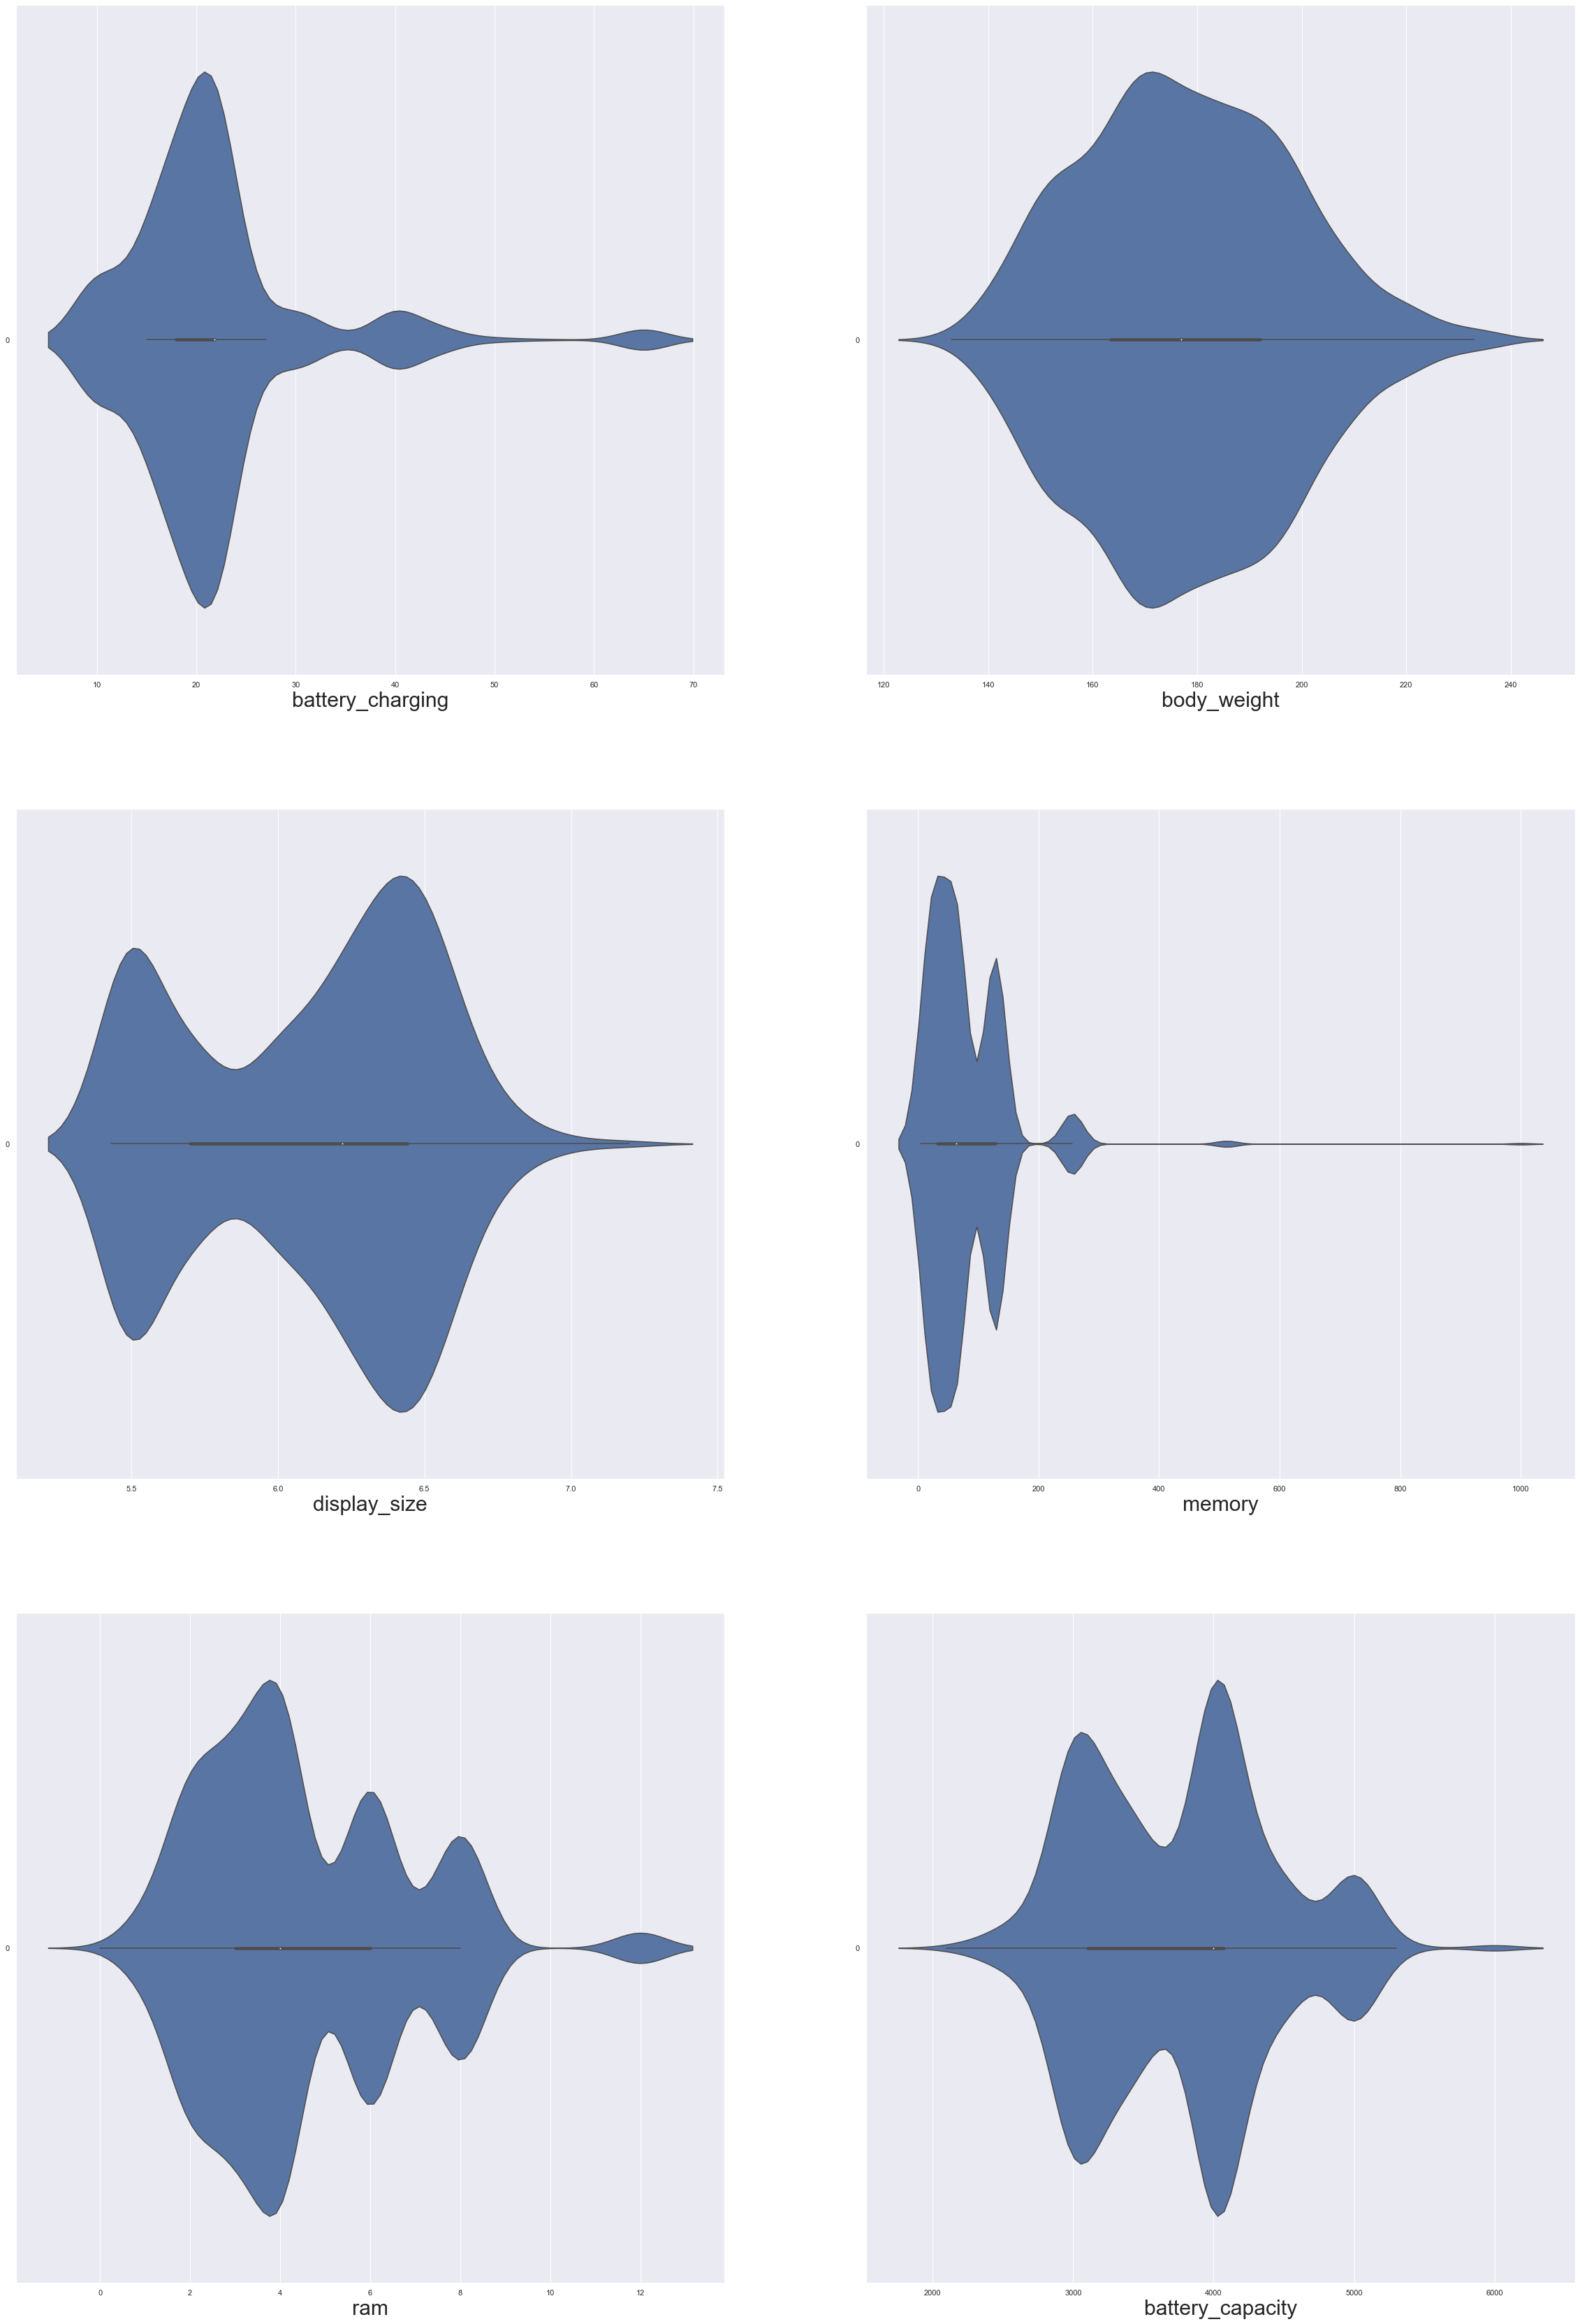

In [6]:
# Draw the distributions of all variables
f, axes = plt.subplots(3, 2,figsize=(40,60))
count = 0
row = 0
numeric_df2 = [x for x in numeric_df if x != 'misc_price']
for var in numeric_df2:
    if count % 2 == 0:
        col = 0
    else:
        col = 1
    sb.violinplot(data = numeric_df[var], orient = "h", ax = axes[row,col])
    ax = axes[row,col]
    ax.set_xlabel(var,fontsize=30)
    count+=1
    if count %2 == 0:
        row+=1

<AxesSubplot:>

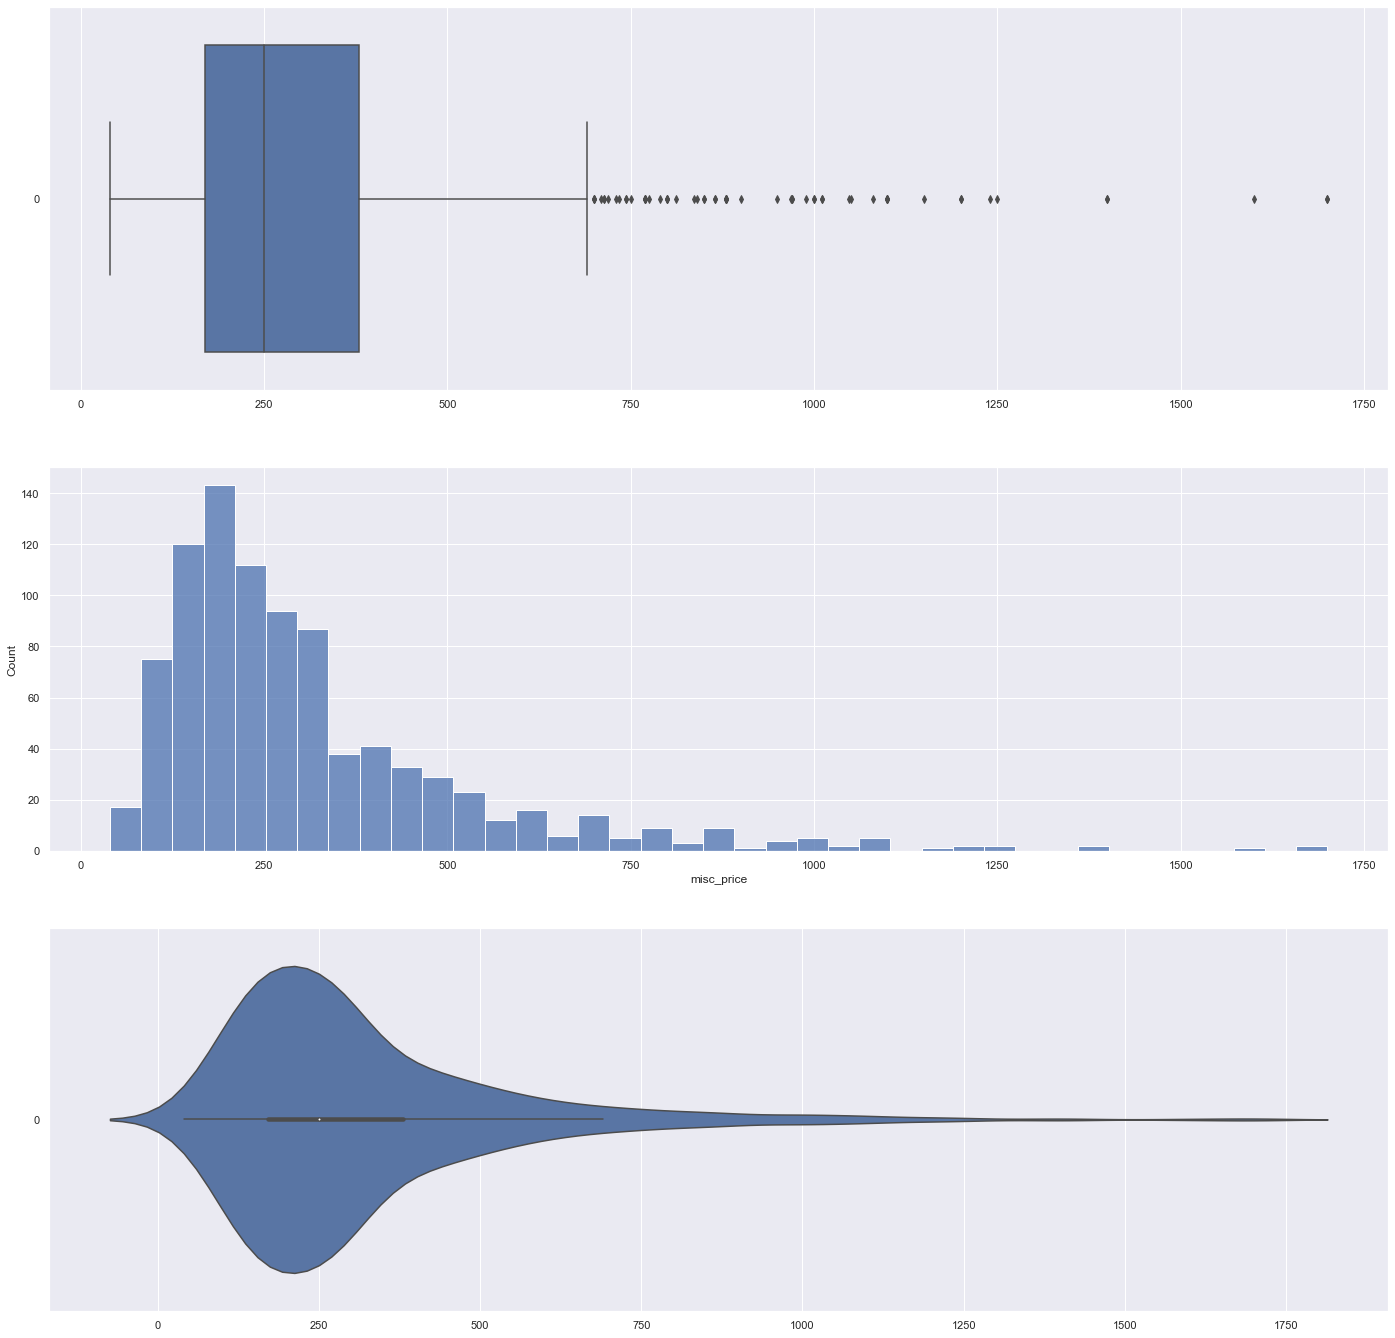

In [7]:
f, axes = plt.subplots(3,figsize=(24, 24))
sb.boxplot(data = numeric_df["misc_price"], orient = "h", ax = axes[0])
sb.histplot(data = numeric_df["misc_price"],ax = axes[1])
sb.violinplot(data = numeric_df["misc_price"], orient = "h", ax = axes[2])

In [8]:
#Transform categorical variables using catboostencoder
Y = df['misc_price'].fillna(df['misc_price'].mean()).values # Target for the model
X = df # Features we use
reg = LinearRegression()
# splitting into two sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

target_enc = ce.CatBoostEncoder()
target_enc.fit(X, Y)

#Transform the features, rename columns with _cb suffix, and join to dataframe
train_CBE = target_enc.transform(X)
#test_CBE = target_enc.transform(X_test)

In [9]:
numeric_df.corr()

,battery_charging,body_weight,display_size,memory,ram,battery_capacity,misc_price
battery_charging,1.000000,0.272295,0.288178,0.302954,0.459316,0.160709,0.388362
body_weight,0.272295,1.000000,0.653306,0.323323,0.394400,0.623842,0.334919
display_size,0.288178,0.653306,1.000000,0.491417,0.581143,0.653898,0.287176
memory,0.302954,0.323323,0.491417,1.000000,0.769718,0.308122,0.603704
ram,0.459316,0.394400,0.581143,0.769718,1.000000,0.386448,0.653394
battery_capacity,0.160709,0.623842,0.653898,0.308122,0.386448,1.000000,0.119680
misc_price,0.388362,0.334919,0.287176,0.603704,0.653394,0.119680,1.000000


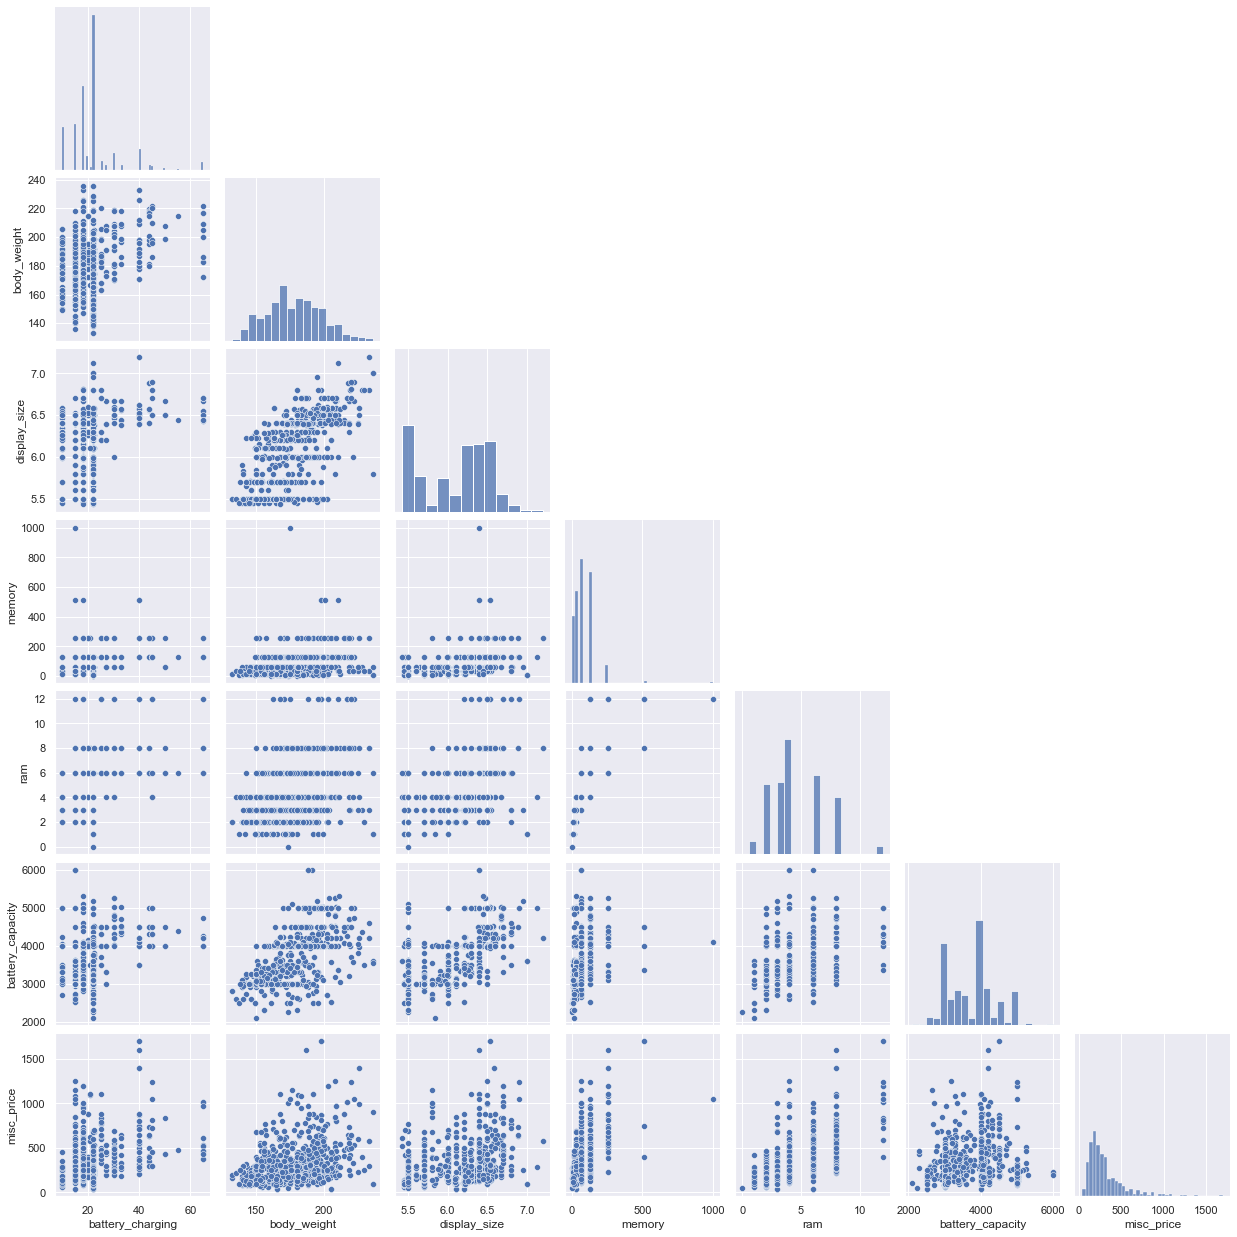

In [10]:
sb.pairplot(data = numeric_df, corner = True)

## Categorical Data

In [11]:
categoric_df = df[['oem', 'model', 'platform_cpu', 'platform_gpu', 'body_sim', 'network_technology', 'display_type', 'main_camera_video', 'selfie_camera_video', 'display_resolution', 'sound_3.5mm_jack', 'platform_os', 'platform_chipset', 'removability']]
categoric_df.describe()

,oem,model,platform_cpu,platform_gpu,body_sim,network_technology,display_type,main_camera_video,selfie_camera_video,display_resolution,sound_3.5mm_jack,platform_os,platform_chipset,removability
count,913,913,912.0,899,913,913,913,905,707,913,913,913,907,913
unique,14,747,5.0,54,27,3,28,6,5,51,2,2,155,2
top,Samsung,One Macro,8.0,PowerVR GE8320,Mini-SIM,LTE,IPS LCD,1080p,1080p,1080 x 2340,Yes,Android,Mediatek MT6762 Helio P22,Non-removable
freq,127,2,754.0,80,404,791,476,463,613,154,792,902,42,834


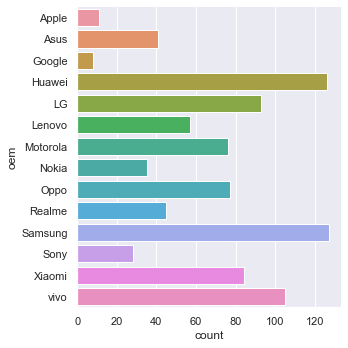

In [12]:
sb.catplot(y = "oem", data = categoric_df, kind = "count")

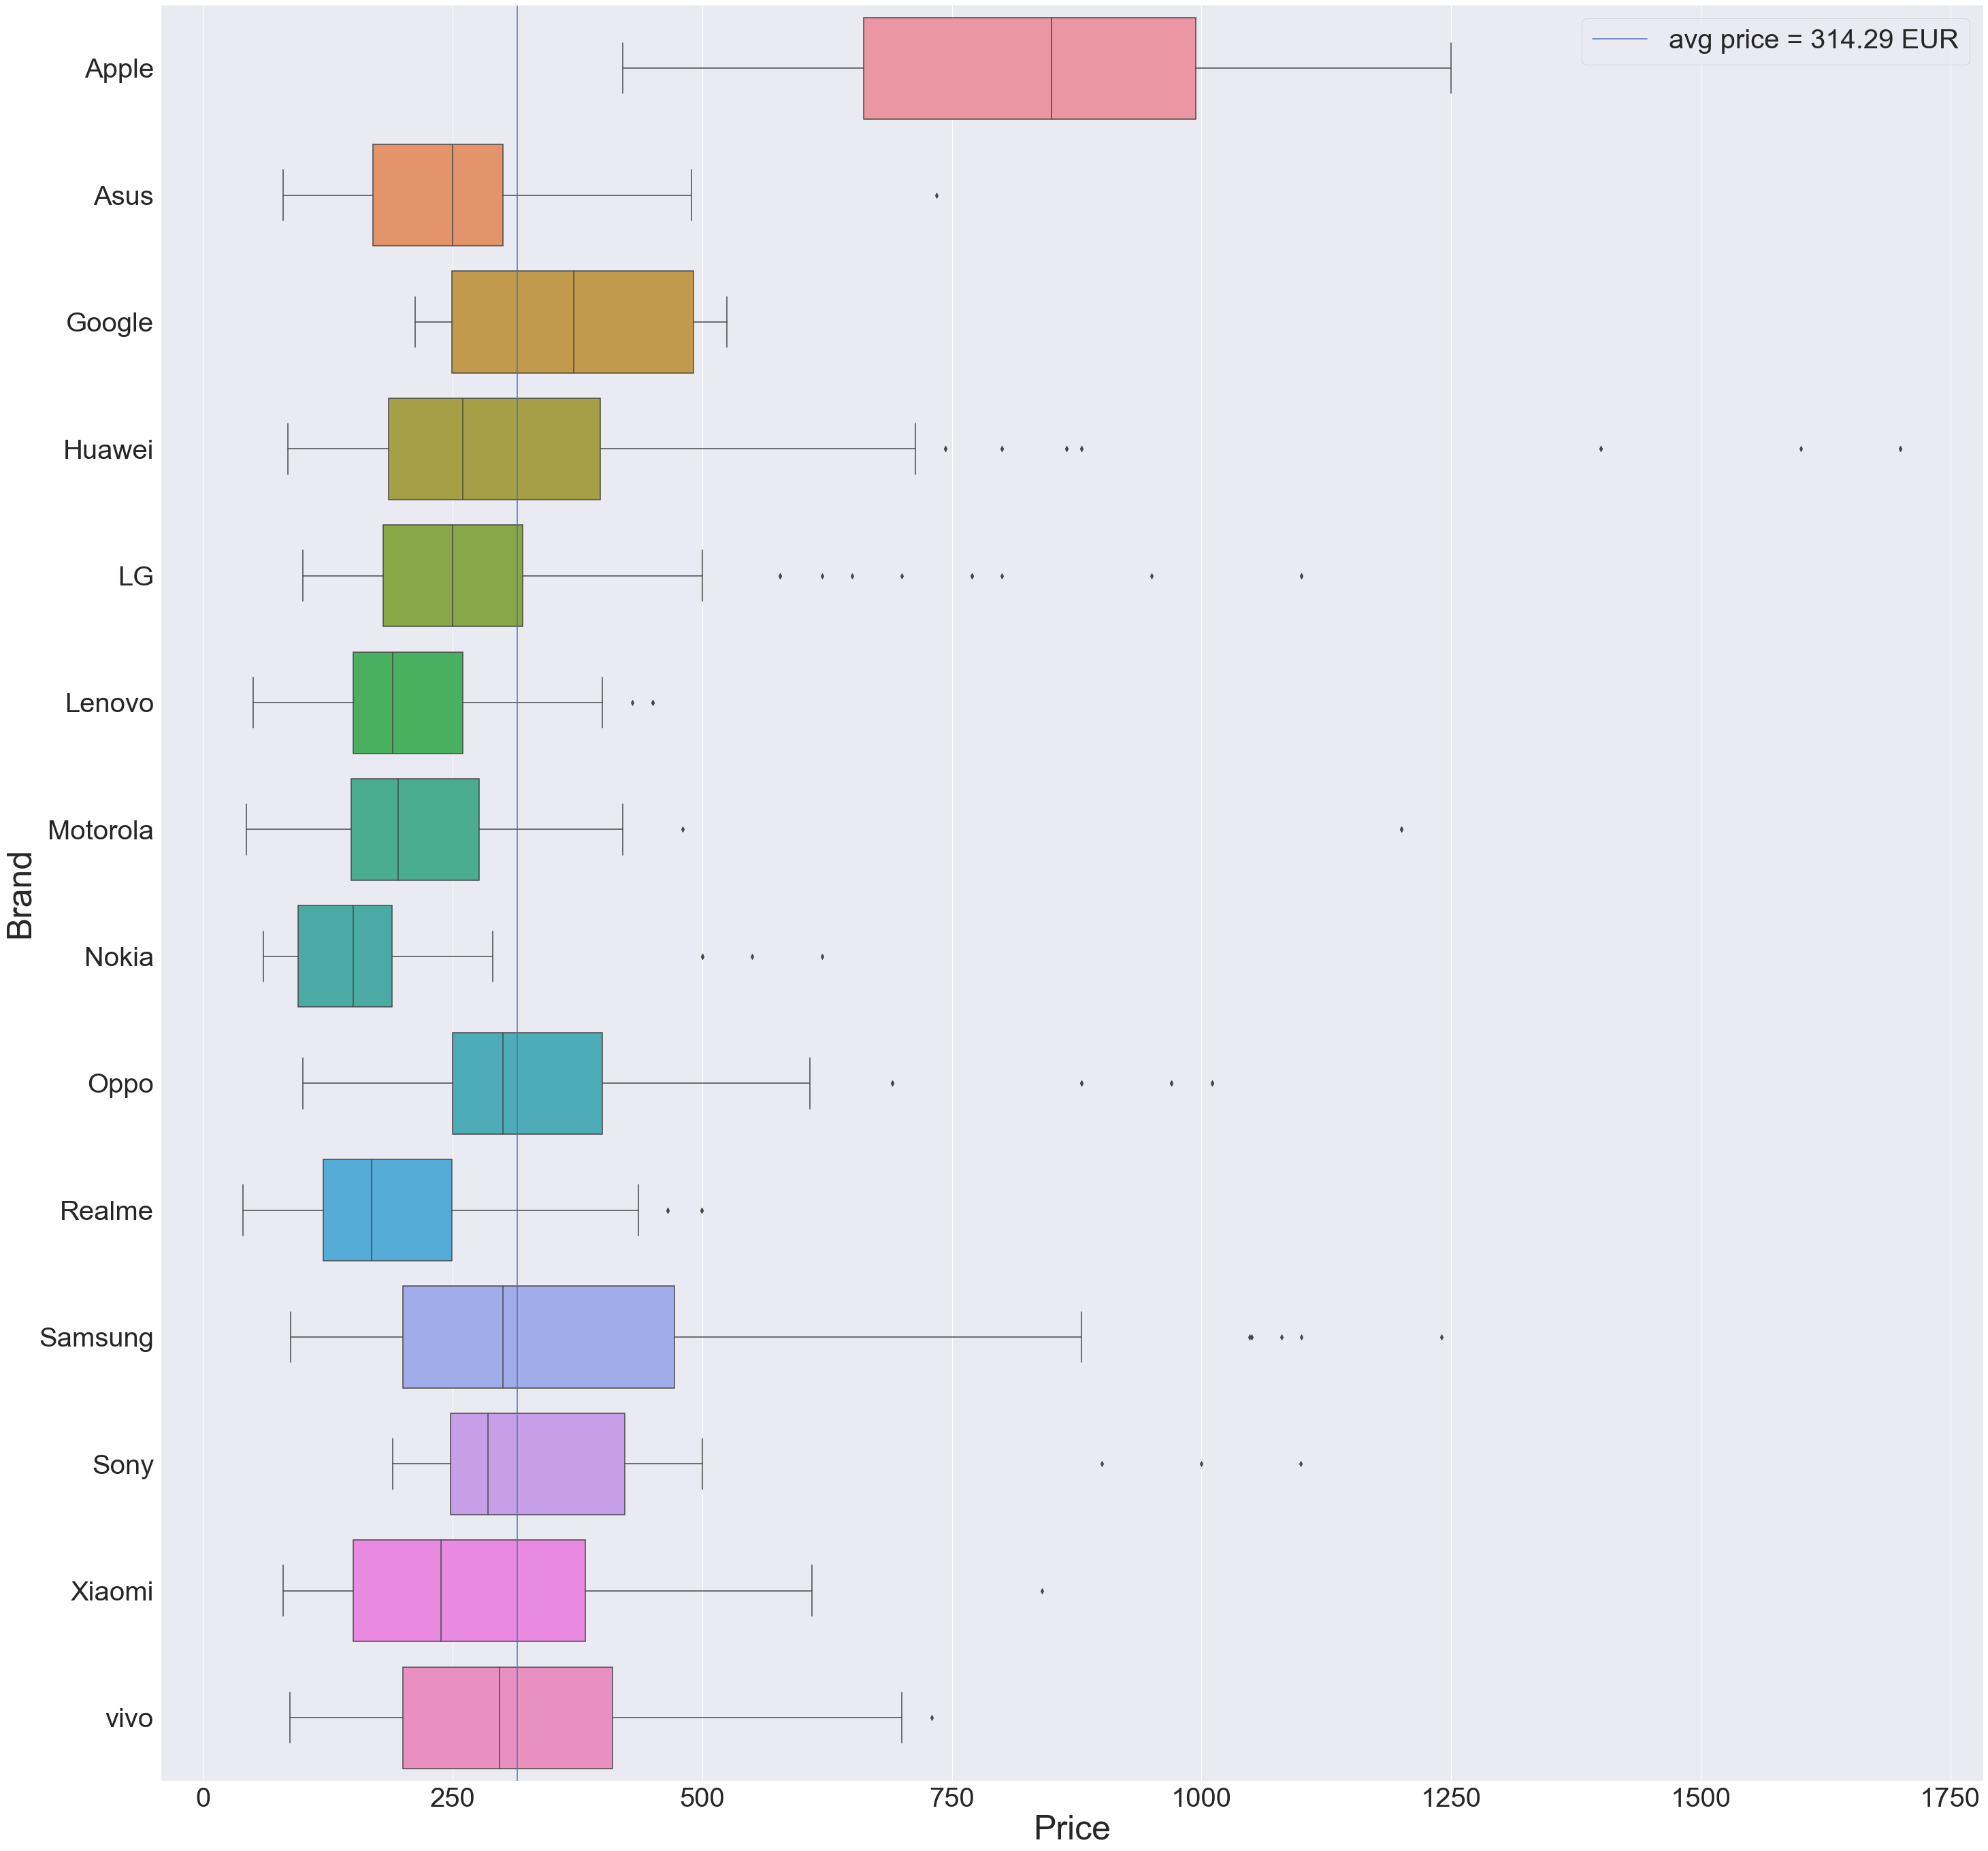

In [13]:
categoric_df2 = df[['oem', 'model', 'platform_cpu', 'platform_gpu', 'body_sim', 'network_technology', 'display_type', 'main_camera_video', 'selfie_camera_video', 'display_resolution', 'sound_3.5mm_jack', 'platform_os', 'platform_chipset', 'removability', 'misc_price']]

f, ax= plt.subplots(figsize=(48, 48))
sb.boxplot(x = "misc_price", y = "oem", data = categoric_df2, orient = 'h')
ax.tick_params(axis='y', labelsize=40)
ax.tick_params(axis='x', labelsize=40)
ax.set_xlabel("Price",fontsize=50)
ax.set_ylabel("Brand",fontsize=50)


plt.axvline(314.291106, label= "avg price = 314.29 EUR")
plt.legend(fontsize=40)
plt.show()

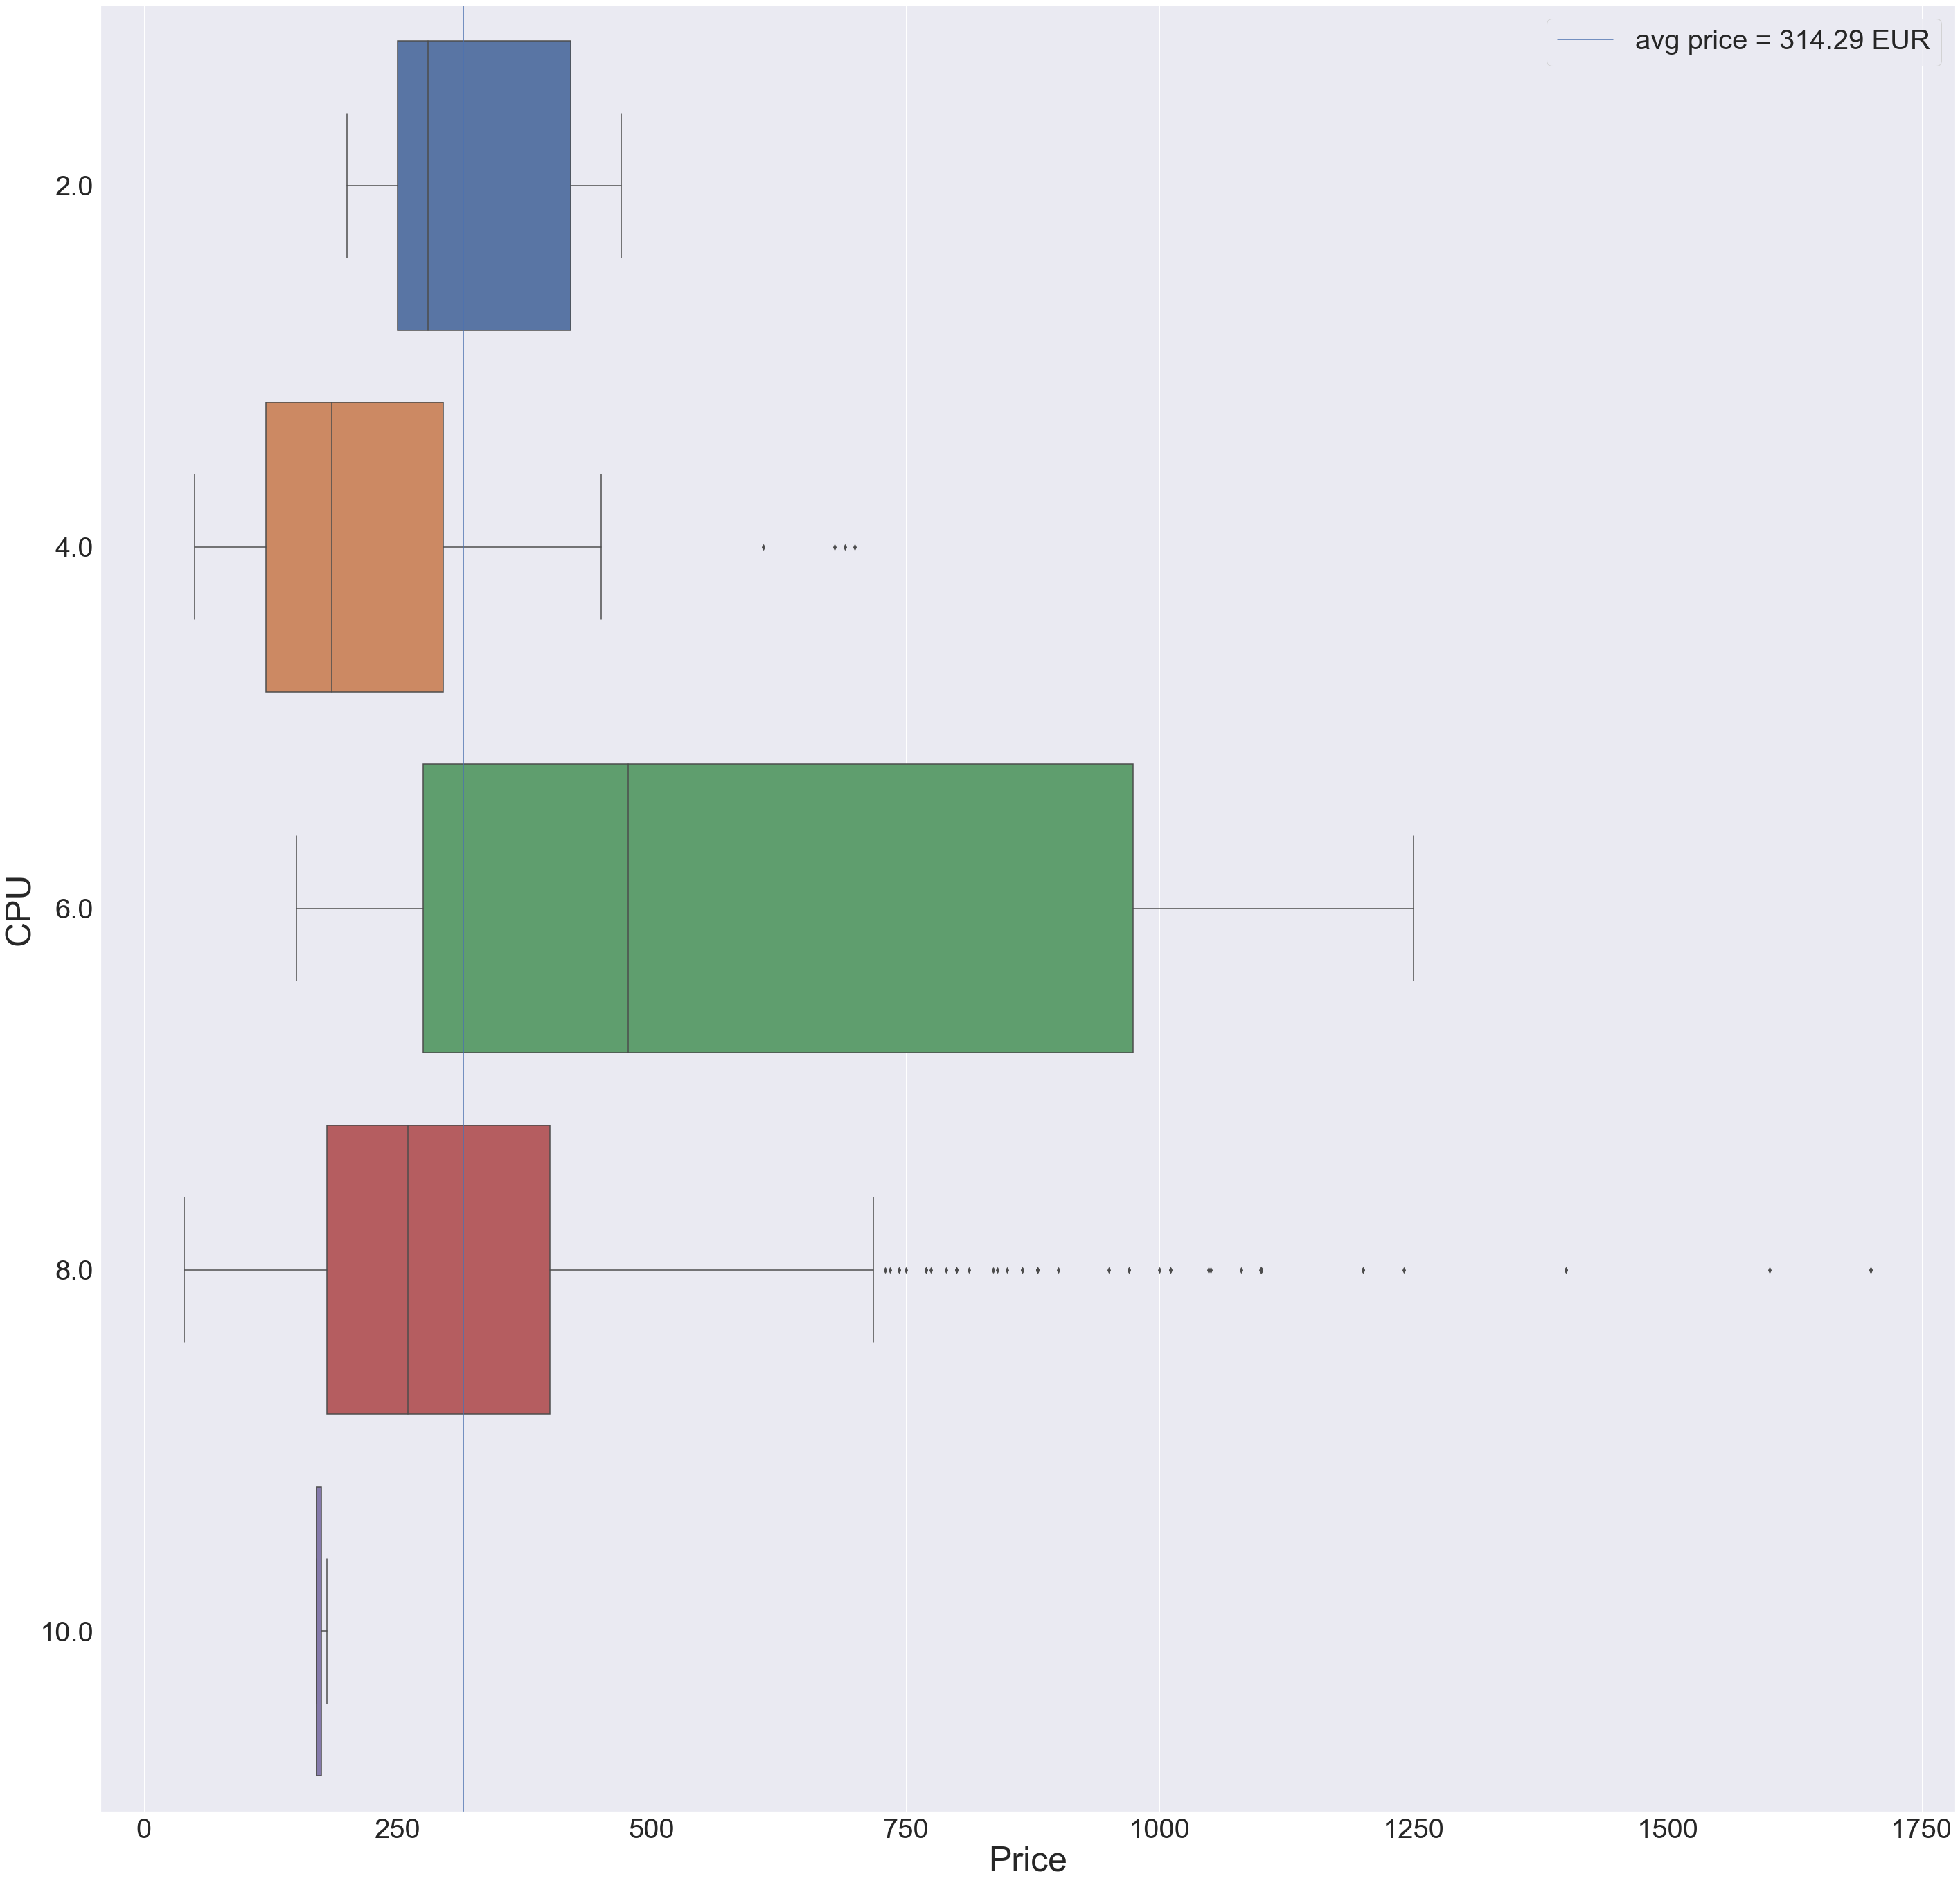

In [14]:
f, ax= plt.subplots(figsize=(48, 48))
sb.boxplot(x = "misc_price", y = "platform_cpu", data = categoric_df2, orient = 'h')
ax.tick_params(axis='y', labelsize=40)
ax.tick_params(axis='x', labelsize=40)
ax.set_xlabel("Price",fontsize=50)
ax.set_ylabel("CPU",fontsize=50)

plt.axvline(314.291106, label= "avg price = 314.29 EUR")
plt.legend(fontsize=40)
plt.show()

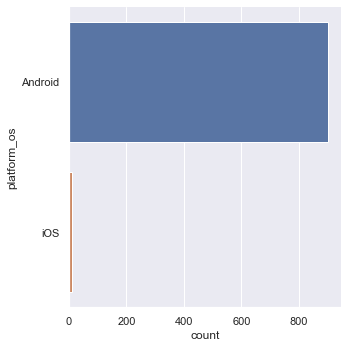

In [15]:
sb.catplot(y = "platform_os", data = categoric_df, kind = "count")

## Combined

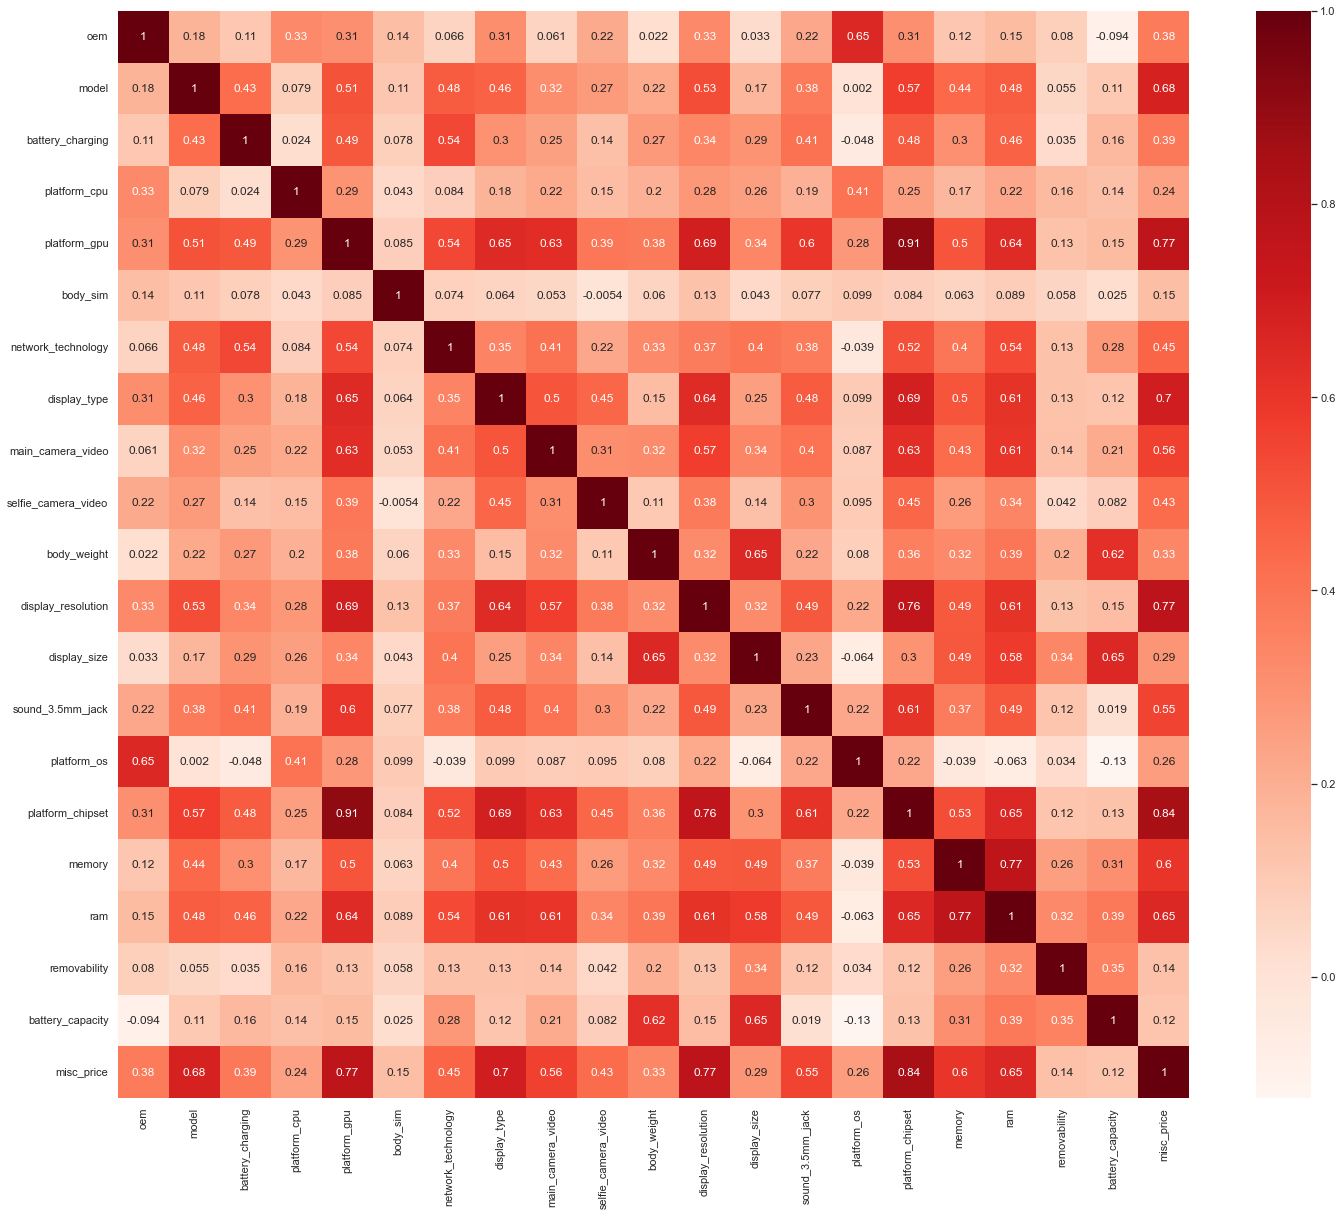

In [16]:
from sklearn.impute import SimpleImputer

# Imputation
my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(train_CBE))
#imputed_X_test = pd.DataFrame(my_imputer.transform(test_CBE))

imputed_X_train.columns = train_CBE.columns
#imputed_X_test.columns = test_CBE.columns


plt.figure(figsize=(24,20))
cor = imputed_X_train.corr()
sb.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()